# Import necessary LIBS

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the data
df=pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Check for duplicate values
df.duplicated().sum()

0

In [5]:
# Check the information around the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Cleaning and Feature Engneering

In [7]:
# Check the target variable and if there is any imbalance

df.Converted.value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

In [8]:
# Treat "Select" as null by replacing it with np.nan

df = df.replace("Select", np.nan)

# Calculate the percentage of null values, including "Select" entries
null_percentage = df.isnull().mean() * 100
print(round(null_percentage, 2))

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Set the cutoff value for the percentage of missing values
cutoff = 35

# Create a list of column names where the percentage of missing values is greater than the cutoff
cols = list(df.columns[df.isnull().mean() * 100 > cutoff])

# Display the list of columns
print(cols)

['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [10]:
df_new=df
# Drop the columns specified in the 'cols' list from the DataFrame 'df_new'
df_new = df_new.drop(cols, axis=1)

df_new.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [11]:
# Check percentage of null values in the revised dataset

round(df_new.isnull().mean() * 100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [12]:
# Deleting all the rows with columns having less than 2% null values

df_new= df_new.dropna(subset=['Lead Source','TotalVisits','Page Views Per Visit','Last Activity'])

In [13]:
# Displaying the %age of unique values in each column

for col in df_new.columns:
    print(round(df_new[col].value_counts()*100/len(df_new[col]),2))
    print('-'*10)

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.01
5379ee79-64b7-44f8-8c56-0e1ca2d5b887    0.01
9757ace3-0656-4400-b519-fe0e3c67599e    0.01
889c1057-97ab-477c-a2b7-423e7df2d226    0.01
dd5ed9c0-298b-416e-b7e3-ee4da8511b8f    0.01
                                        ... 
bff6c61d-25e3-4b1e-bf17-b634c91f3e2f    0.01
c62678c1-e741-4874-b5cf-500b2e8e2a78    0.01
4e859886-6ae2-462b-abd0-1df6ae65d8bf    0.01
78a9c58c-c287-41e3-a0f5-034061b73343    0.01
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.01
Name: count, Length: 9074, dtype: float64
----------
Lead Number
660737    0.01
602411    0.01
602438    0.01
602435    0.01
602420    0.01
          ... 
630128    0.01
630135    0.01
630139    0.01
630158    0.01
579533    0.01
Name: count, Length: 9074, dtype: float64
----------
Lead Origin
Landing Page Submission    53.84
API                        39.43
Lead Add Form               6.40
Lead Import                 0.33
Name: count, dtype: float64
----------
Lead Source
Google         

In [14]:
# Dropping the categorical columns with less than 10% variety for atleast 2 unique values, based on the result in the query above. Also dropping "Prospect ID" and "Lead Number", which are unique and not required in the analysis

df_new = df_new.drop(['What is your current occupation','Do Not Email','Do Not Call','Country','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Prospect ID','Lead Number'], axis=1)

In [15]:
# Check the revised dataset

df_new.shape

(9074, 9)

In [16]:
# checking value_counts for futher process
df_new['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [17]:
# Replace NaN values with the mode of the column
mode_value = df_new['Lead Source'].mode()[0]
df_new['Lead Source'].fillna(mode_value, inplace=True)

# Standardize case
df_new['Lead Source'] = df_new['Lead Source'].str.strip().str.title()

# Merge duplicates and specific entries
df_new['Lead Source'] = df_new['Lead Source'].replace({
    'Google': 'Google',
    'Live Chat': 'Olark Chat',
    'Referral Sites': 'Reference' 
})

# Define the low-frequency threshold
low_freq_threshold = 50
lead_source_counts = df_new['Lead Source'].value_counts()

# Group low-frequency categories as 'Other'
df_new['Lead Source'] = df_new['Lead Source'].apply(
    lambda x: x if lead_source_counts.get(x, 0) >= low_freq_threshold else 'Other'
)

# Verify the cleaned column
print(df_new['Lead Source'].value_counts())

Lead Source
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            568
Welingak Website     129
Other                 52
Name: count, dtype: int64


In [18]:
#verify null values
df_new.isnull().mean() * 100

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [20]:
# Define a dictionary to map specific activities to broader categories
activity_mapping = {
    'Email Opened': 'Email Activity',
    'Email Bounced': 'Email Activity',
    'Email Link Clicked': 'Email Activity',
    'Email Received': 'Email Activity',
    'Email Marked Spam': 'Email Activity',
    'Resubscribed to emails': 'Email Activity',
    'Unsubscribed': 'Email Activity',

    'View in browser link Clicked': 'Website Activity',
    'Page Visited on Website': 'Website Activity',
    'Form Submitted on Website': 'Website Activity',
    
    'SMS Sent': 'Direct Communication',
    'Olark Chat Conversation': 'Direct Communication',
    'Had a Phone Conversation': 'Direct Communication',
    'Approached upfront': 'Direct Communication',
    
    'Visited Booth in Tradeshow': 'Unreachable',
    'Unreachable': 'Unreachable'
}

# Apply the mapping to the 'Last Activity' column
df_new['Last Activity'] = df_new['Last Activity'].replace(activity_mapping)

# Verify the cleaned categories
print(df_new['Last Activity'].value_counts())

Last Activity
Email Activity          4075
Direct Communication    3718
Website Activity         762
Converted to Lead        428
Unreachable               91
Name: count, dtype: int64


In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   A free copy of Mastering The Interview  9074 non-null   object 
 8   Last Notable Activity                   9074 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 708.9+ KB


In [22]:
#verify value_counts for futher process
df_new['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
No     6186
Yes    2888
Name: count, dtype: int64

In [23]:
# Define a dictionary to map specific activities to broader categories
activity_mapping2 = {
    'Email Opened': 'Email Activity',
    'Email Bounced': 'Email Activity',
    'Email Link Clicked': 'Email Activity',
    'Email Received': 'Email Activity',
    'Email Marked Spam': 'Email Activity',
    'Resubscribed to emails': 'Email Activity',
    'Unsubscribed': 'Email Activity',

    'View in browser link Clicked': 'Website Activity',
    'Page Visited on Website': 'Website Activity',
    'Form Submitted on Website': 'Website Activity',
    
    'SMS Sent': 'Direct Communication',
    'Olark Chat Conversation': 'Direct Communication',
    'Had a Phone Conversation': 'Direct Communication',
    'Approached upfront': 'Direct Communication',
    
    
    'Unreachable': 'Others'
}

# Apply the mapping to the 'Last Activity' column
df_new['Last Notable Activity'] = df_new['Last Notable Activity'].replace(activity_mapping2)

# Verify the cleaned categories
print(df_new['Last Notable Activity'].value_counts())


Last Notable Activity
Modified                3267
Email Activity          3105
Direct Communication    2350
Website Activity         320
Others                    32
Name: count, dtype: int64


In [24]:
# Convert 'Yes' to 1 and 'No' to 0 for each relevant column
binary_columns = ['A free copy of Mastering The Interview']

df_new[binary_columns] = df_new[binary_columns].applymap(lambda x: 1 if x == 'Yes' else 0)
df_new[binary_columns] = df_new[binary_columns].astype(int)
print(df_new[binary_columns].dtypes)

A free copy of Mastering The Interview    int32
dtype: object


In [25]:
df_new.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Website Activity,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Activity,0,Email Activity
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Activity,1,Email Activity
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,0,Modified


# Handling outliers

In [27]:
df_new.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151,0.318272
std,0.485053,4.858802,545.256560,2.160871,0.465831
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000,0.000000
50%,0.000000,3.000000,246.000000,2.000000,0.000000
75%,1.000000,5.000000,922.750000,3.200000,1.000000
max,1.000000,251.000000,2272.000000,55.000000,1.000000


In [28]:
# There are outliers in "TotalVisits" and "Page Views Per Visit" columns

In [29]:
# Calculate the IQR and upper whisker for each column
q1_total_visits = df_new['TotalVisits'].quantile(0.25)
q3_total_visits = df_new['TotalVisits'].quantile(0.75)
iqr_total_visits = q3_total_visits - q1_total_visits
upper_whisker_total_visits = q3_total_visits + 1.5 * iqr_total_visits

q1_page_views = df_new['Page Views Per Visit'].quantile(0.25)
q3_page_views = df_new['Page Views Per Visit'].quantile(0.75)
iqr_page_views = q3_page_views - q1_page_views
upper_whisker_page_views = q3_page_views + 1.5 * iqr_page_views

# Remove rows where values exceed the upper whisker
df_new_filtered = df_new[(df_new['TotalVisits'] <= upper_whisker_total_visits) &
                         (df_new['Page Views Per Visit'] <= upper_whisker_page_views)]

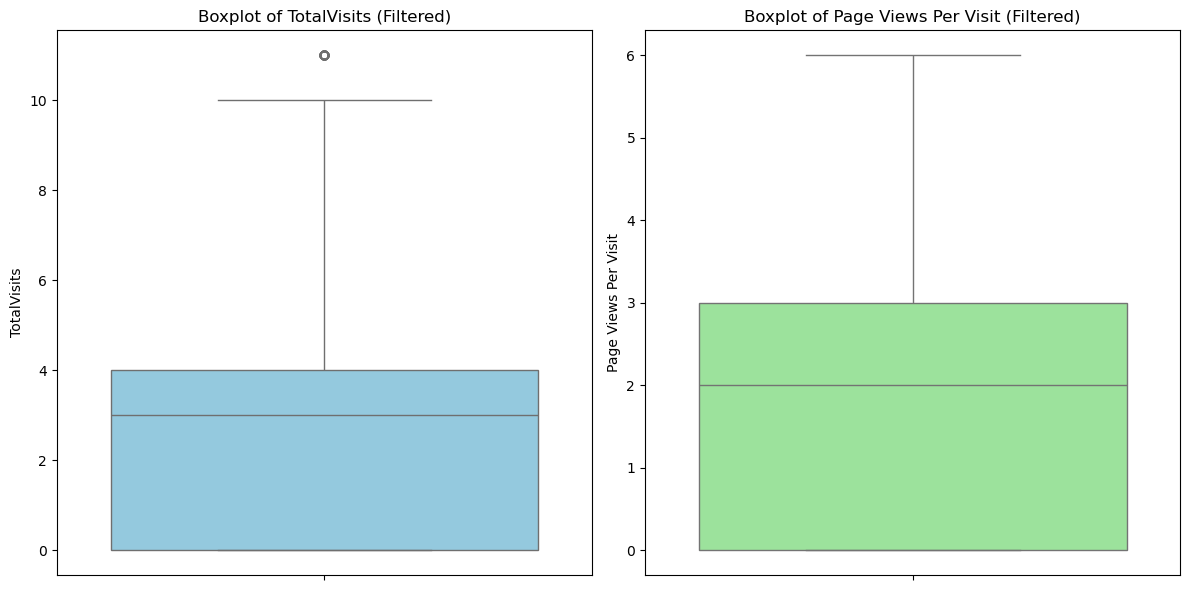

In [30]:
# Plot the boxplots for the filtered data
plt.figure(figsize=(12, 6))

# Boxplot for TotalVisits
plt.subplot(1, 2, 1)
sns.boxplot(y=df_new_filtered['TotalVisits'], color='skyblue')
plt.title('Boxplot of TotalVisits (Filtered)')
plt.ylabel('TotalVisits')

# Boxplot for Page Views Per Visit
plt.subplot(1, 2, 2)
sns.boxplot(y=df_new_filtered['Page Views Per Visit'], color='lightgreen')
plt.title('Boxplot of Page Views Per Visit (Filtered)')
plt.ylabel('Page Views Per Visit')

# Show the plots
plt.tight_layout()
plt.show()

In [31]:
# Save the DataFrame to a CSV file with the specified file path and name, and exclude the index from being written to the file

df_new_filtered.to_csv('Lead_data_clean.csv', index=False)